In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Data Source: http://www.statiz.co.kr/
picher_file_path = 'C:/python-data-analysis-master/python-data-analysis-master/data/picher_stats_2017.csv'
batter_file_path = 'C:/python-data-analysis-master/python-data-analysis-master/data/batter_stats_2017.csv'

picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

print(picher.columns)
print(len(picher.columns))

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')
22


In [12]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [13]:
print(picher.shape)

(152, 22)


In [15]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

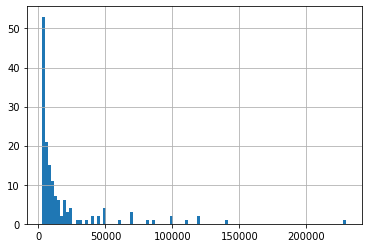

In [35]:
picher['연봉(2018)'].hist(bins=100) # distribution of 2018 salary, bins: decide how many areas you want to split into

<AxesSubplot:>

C:\Users\chica\anaconda3\envs\pythoncode\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\chica\anaconda3\envs\pythoncode\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\chica\anaconda3\envs\pythoncode\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chica\anaconda3\envs\pythoncode\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chica\anaconda3\envs\pythoncode\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chica\anaconda3\envs\pythoncode\lib\site-pac

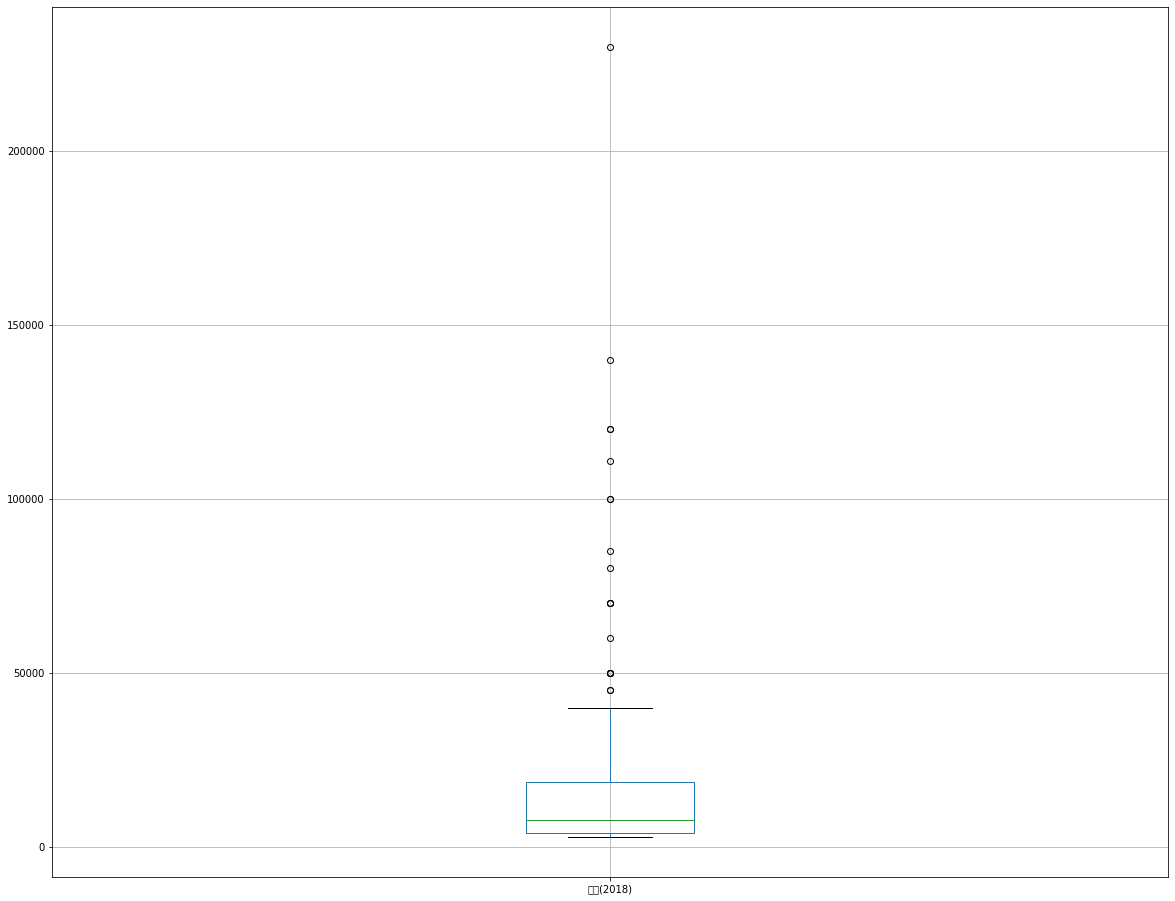

In [43]:
picher.boxplot(column=['연봉(2018)'])

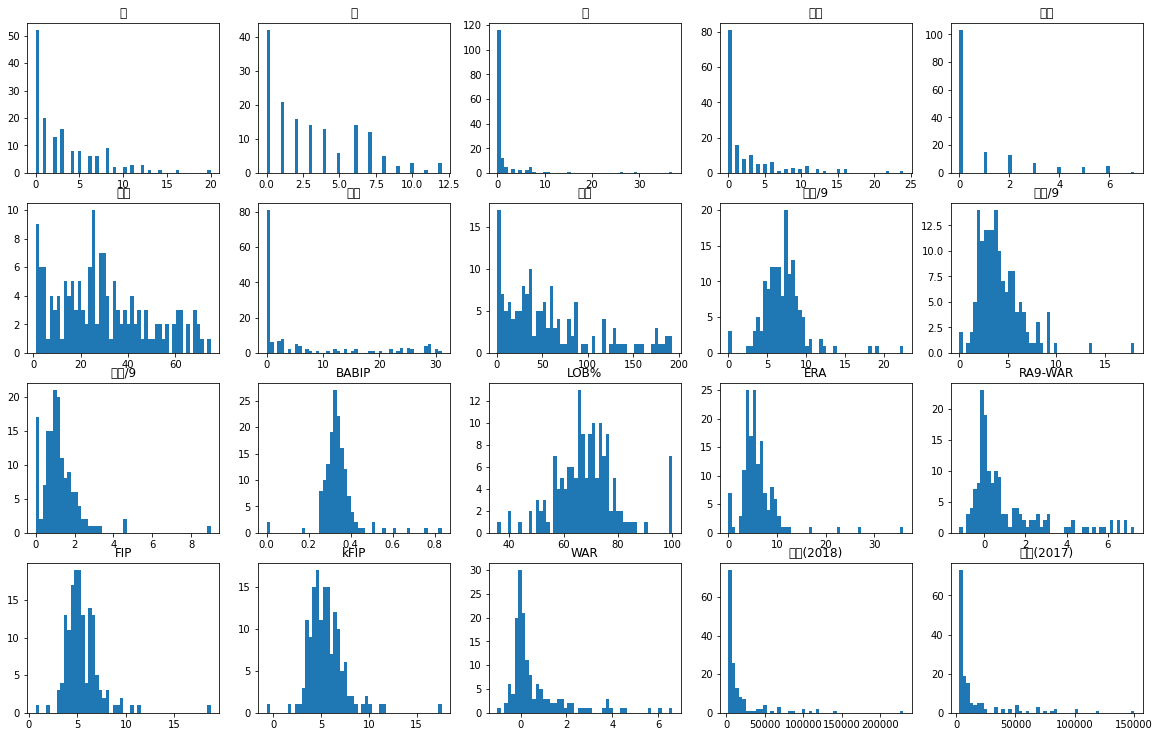

None


In [45]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9','볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 
       '연봉(2018)', '연봉(2017)']]

def plot_hist_each_column(df):
       plt.rcParams['figure.figsize'] = [20,16]
       fig = plt.figure(1)

       # prints as many subplots as the number of df's columns
       for i in range(len(df.columns)):
              ax = fig.add_subplot(5,5,i+1)
              plt.hist(df[df.columns[i]], bins=50)
              ax.set_title(df.columns[i])
       plt.show()

print(plot_hist_each_column(picher_features_df))

In [46]:
# it makes pandas print float type data not scientific-notation
pd.options.mode.chained_assignment = None

In [47]:
def standard_scaling(df,scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std) # z-value
    return df

In [48]:
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9','볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 
    '연봉(2018)', '연봉(2017)']
picher_df = standard_scaling(picher,scale_columns)
picher_df = picher_df.rename(columns={'연봉(2018)':'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,3.912893,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,3.266495,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,6.821679,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,2.620098,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,2.975617,2.734705
